# Learning and Intelligent Decision Making

Grupo:

- Micael Riboura - https://github.com/MicaelRiboura - Matrícula 2421764
- Lucas Tavares - https://github.com/LucasTavrs2 - Matrícula 2521346
- Yang Miranda - https://github.com/yangricardo - Matrícula 2521249
- Olavo Lucas - https://github.com/OLMS99 - Matricula: 2521361

## Laboratory: Reinforcement learning


### 1. The key world domain

Consider once again the gridworld domain from the previous lab and which you modeled using a Markov decision problem.

<img src="maze.png" width="200px">

Recall that:

* At each step, the agent may move in any of the four directions -- up, down, left and right.

* Movement across a _grey_ cell division succeeds with a $0.8$ probability and fails with a $0.2$ probability. 

* Movements across colored cell divisions (blue or red) succeed with a $0.8$ probability _but only if the agent has the corresponding colored key_. Otherwise, they fail with probability $1$. 

* When the movement fails, the agent remains in the same cell. 

* To get a colored key, the agent simply needs to stand in the corresponding cell. 

* The goal of the agent is to reach the cell marked with **"G"**. 

Throughout the lab, use $\gamma=0.99$. As seen in the previous lab, this problem can be modeled as a Markov decision problem $(\mathcal{X},\mathcal{A},\{\mathbf{P_a}\},c,\gamma\}$ as follows.

In [6]:
%matplotlib notebook
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
np.set_printoptions(precision=2, suppress=True)
from typing import List


# States
S = ['1BR', '2', '2R', '2BR', '3', '3R', '3BR', '4', '4R', '4BR', '5', '5R', '5BR', '6BR', '7R', '7BR']

# Actions
A = ['U', 'D', 'L', 'R']

# Transition probabilities
U = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2]])

D = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

L = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.8, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.2, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

R = np.array([[0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.8, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.8, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

P = [U, D, L, R]

# Reward function
             
Rw = np.array([[0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0],
               [1.0, 1.0, 1.0, 1.0],
               [0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0]])

# Discount rate

gamma = 0.99

num_states = len(S)
num_actions = len(A)

---

#### Activity 1.        

Compute the optimal $Q$-function for the MDP defined above using value iteration. As your stopping condition, use an error between iterations smaller than `1e-8`.

---

In [7]:
%matplotlib inline

def compute_mdp_optimal_q_function(
  s_states: List[str], 
  a_actions: List[str], 
  P_transitions: List[np.ndarray], 
  R_rewards: np.ndarray, 
  gamma_discount_factor: float, 
  error_tolerance: float = 1e-8,
  plot_graph: bool = False
) -> (np.ndarray, List[float]):
  """
  Calcula a função Q ótima para um dado MDP usando iteração de valor.

  Args:
    s_states (List[str]): Lista de estados (S).
    a_actions (List[str]): Lista de ações (A).
    P_transitions (List[np.ndarray]): Matrizes de probabilidade de transição (P).
    R_rewards (np.ndarray): Matriz de recompensa (R).
    gamma_discount_factor (float): Fator de desconto (γ).
    error_tolerance (float): Critério de parada para a iteração de valor.

  Returns:
    (np.ndarray, List[float]): Tupla contendo a função Q ótima (Q*) e a lista de erros por iteração.
  """
  # Obtém o número de estados do ambiente.
  n_states = len(s_states)
  # Obtém o número de ações possíveis.
  n_actions = len(a_actions)
  
  # Inicializa a função de valor V(s) com zeros para todos os estados.
  V_function = np.zeros((n_states, 1))
  
  # Define um erro inicial infinito para garantir que o loop de iteração de valor comece.
  delta_error = float('inf')
  # Lista para armazenar o erro a cada iteração.
  error_history = []

  # Inicia o loop de iteração de valor, que continua até que a convergência seja alcançada.
  while delta_error > error_tolerance:
    # Salva a função de valor da iteração anterior para calcular o erro de convergência.
    V_old_function = np.copy(V_function)
    # Inicializa uma matriz para armazenar os valores Q para a iteração atual.
    Q_values = np.zeros((n_states, n_actions))
    
    # Itera sobre cada ação para calcular os valores Q correspondentes.
    for a_index in range(n_actions):
      # Obtém o vetor de recompensas para a ação atual.
      R_for_action = R_rewards[:, a_index]
      # Obtém a matriz de transição de probabilidade para a ação atual.
      P_for_action = P_transitions[a_index]
      # Calcula o valor esperado futuro descontado, usando a função de valor da iteração anterior.
      E_future_value = gamma_discount_factor * P_for_action.dot(V_old_function).flatten()
      # Calcula os valores Q para a ação atual somando a recompensa imediata e o valor futuro esperado.
      Q_values[:, a_index] = R_for_action + E_future_value
        
    # Atualiza a função de valor para cada estado, escolhendo o valor Q máximo entre todas as ações.
    V_function = np.max(Q_values, axis=1).reshape(-1, 1)
    
    # Calcula o erro máximo absoluto entre a função de valor nova e a antiga para verificar a convergência.
    delta_error = np.max(np.abs(V_function - V_old_function))
    # Adiciona o erro atual ao histórico.
    error_history.append(delta_error)

  # Após a convergência da função de valor, calcula a função Q ótima final.
  Q_optimal_function = np.zeros((n_states, n_actions))
  # Itera sobre cada ação para calcular os valores Q ótimos.
  for a_index in range(n_actions):
    # Obtém o vetor de recompensas para a ação atual.
    R_for_action = R_rewards[:, a_index]
    # Obtém a matriz de transição de probabilidade para a ação atual.
    P_for_action = P_transitions[a_index]
    # Calcula o valor esperado futuro descontado usando a função de valor ótima convergida.
    E_future_value = gamma_discount_factor * P_for_action.dot(V_function).flatten()
    # Calcula os valores Q ótimos para a ação atual.
    Q_optimal_function[:, a_index] = R_for_action + E_future_value
      
  # Retorna a função Q ótima calculada e o histórico de erros.
  if plot_graph:
    plt.figure()
    plt.plot(error_history)
    plt.yscale('log')
    plt.xlabel('Iteration')
    plt.ylabel('Max Value Function Change (Delta)')
    plt.title(f'Value Iteration Convergence\n'
          f'MDP Error Tolerance: {error_tolerance} | '
          f'Gamma Discount Factor: {gamma_discount_factor} | '
          f'Total Iterations: {len(error_history)}\n'
          f'States: {len(s_states)} | Actions: {len(a_actions)}')
    plt.grid(True)
    plt.show()
  return Q_optimal_function, error_history

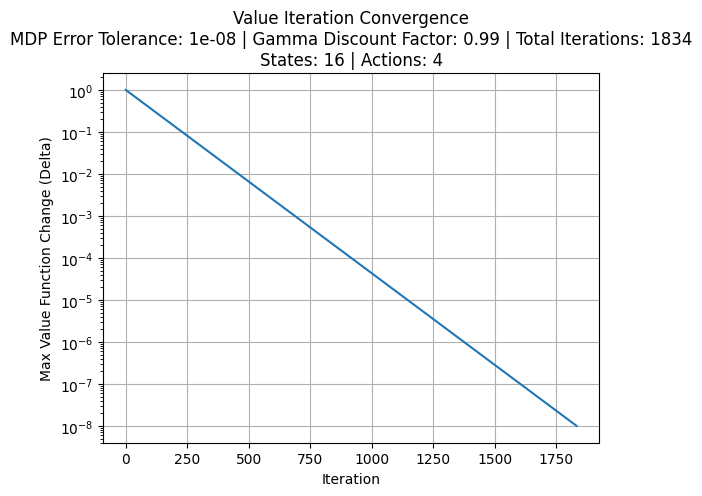

In [8]:
# Calcula a função Q ótima e obtém o histórico de erros
Q_star, errors = compute_mdp_optimal_q_function(s_states=S, a_actions=A, P_transitions=P, R_rewards=Rw, gamma_discount_factor=gamma, error_tolerance=1e-8, plot_graph=True)

---

#### Activity 2.        

Write down a Python function that, given a Q-function $Q$ and a state $s$, selects an action using the $\epsilon$-greedy policy. Specifically, your function should receive as input a Q-function $Q$, a state $s$, and a probability $\epsilon$ with a default value `eps=0.1`. Your function should return:

* a random action with a probability $\\epsilon$,
* an action corresponding to the maximum value of `Q` with a probability $1-\epsilon$. If more than one action has the same maximum `Q` value, the function should select one of these actions **uniformly at random**.

---

In [9]:
def select_action_epsilon_greedy(
  q_function: np.ndarray, 
  state_index: int, 
  epsilon_choice_random: float = 0.1
) -> int:
  """
  Seleciona uma ação para um dado estado usando a política epsilon-greedy.

  Args:
    q_function (np.ndarray): A matriz de valores Q (estados x ações).
    state_index (int): O índice do estado atual.
    epsilon (float): A probabilidade de escolher uma ação aleatória (exploração). 
                      O padrão é 0.1.

  Returns:
      int: O índice da ação selecionada.
  """
  # Obtém o número de ações possíveis a partir do formato da função Q.
  num_actions = q_function.shape[1]
  
  # Gera um número aleatório entre 0 e 1.
  if np.random.rand() < epsilon_choice_random:
    # Fase de Exploração: seleciona uma ação aleatória com probabilidade epsilon.
    # np.random.choice escolhe um inteiro aleatório de 0 até num_actions-1.
    return np.random.choice(num_actions)
  else:
    # Fase de Exploitation: seleciona a melhor ação com probabilidade 1-epsilon.
    # Obtém os valores Q para o estado atual.
    q_values_for_state = q_function[state_index]
    
    # Encontra o valor Q máximo para o estado atual.
    max_q_value = np.max(q_values_for_state)
    
    # Encontra todas as ações que têm o valor Q máximo (pode haver empates).
    best_actions_indices = np.where(q_values_for_state == max_q_value)[0]
    
    # Seleciona uma das melhores ações de forma aleatória para quebrar empates.
    return np.random.choice(best_actions_indices)

### 2. Model-based learning

You will now run the model-based learning algorithm discussed in class, and evaluate its learning performance.

---

#### Activity 3.        

Run the model-based reinforcement learning algorithm discussed in class to compute $Q^*$ for $5,000$ iterations. Initialize each transition probability matrix as the identity and the reward function as all-zeros. Use an $\epsilon$-greedy policy with $\epsilon=0.1$ (use the function from Activity 2). Note that, at each step,

* You will need to select an action according to the $\epsilon$-greedy policy;
* With the state and action, you will then compute the reward and generate the next state; 
* With this transition information (state, action, reward, next state), you can now perform an update. 
* When updating the components $(s,a)$ of the model, use the step-size

$$\alpha_t=\frac{1}{N_t(s,a)+1},$$

where $N_t(s,a)$ is the number of visits to the pair $(s,a)$ up to time step $t$.

In order to ensure that your algorithm visits every state and action a sufficient number of times, after the agent reaches the goal cell, make one further step, the corresponding update, and then reset the position of the agent to a random state in the environment.

Plot the norm $\|Q^*-Q^{(k)}\|$ every iteration of your method, where $Q^*$ is the optimal $Q$-function computed in Activity 1.

**Note:** The simulation may take a bit. Don't despair.

---

In [10]:
%matplotlib inline

def run_model_based_learning(
  s_states: List[str] = S.copy(),
  a_actions: List[str] = A.copy(),
  P_true: List[np.ndarray] = P.copy(),
  R_true: np.ndarray = Rw.copy(),
  gamma_discount_factor: float = gamma,
  q_star_optimal: np.ndarray = Q_star.copy(),
  num_iterations: int = 5000,
  epsilon_choice_random: float = 0.1,
  mdp_error_tolerance: float = 1e-8,
  plot_graph: bool = True
) -> List[float]:
  """
  Executa o algoritmo de aprendizado de reforço baseado em modelo.

  Args:
      s_states (List[str]): Lista de nomes dos estados.
      a_actions (List[str]): Lista de nomes das ações.
      P_true (List[np.ndarray]): Matrizes de transição verdadeiras do ambiente.
      R_true (np.ndarray): Matriz de recompensa verdadeira do ambiente.
      gamma_discount_factor (float): Fator de desconto.
      q_star_optimal (np.ndarray): A função Q ótima verdadeira para cálculo do erro.
      num_iterations (int): O número de iterações de aprendizado.
      epsilon (float): O valor de epsilon para a política epsilon-greedy.

  Returns:
      List[float]: Uma lista contendo a norma do erro ||Q* - Q_k|| a cada iteração.
  """
  num_states = len(s_states)
  num_actions = len(a_actions)
  goal_state_index = s_states.index('6BR')

  # 1. Inicialização
  # Inicializa as estimativas das matrizes de transição (P_hat) como identidades.
  P_hat = [np.identity(num_states) for _ in range(num_actions)]
  # Inicializa a estimativa da função de recompensa (R_hat) com zeros.
  R_hat = np.zeros((num_states, num_actions))
  # Inicializa a contagem de visitas N(s, a) para cada par estado-ação com zeros.
  N_visits = np.zeros((num_states, num_actions))
  # Inicializa a função Q com zeros.
  Q_k = np.zeros((num_states, num_actions))

  # Lista para armazenar o erro a cada iteração.
  error_history = []

  # Inicia o agente em um estado aleatório.
  current_state_index = np.random.randint(num_states)

  # 2. Loop de Iterações
  for k in range(num_iterations):
    # Seleciona uma ação usando a política epsilon-greedy com a Q-function atual.
    action_index = select_action_epsilon_greedy(Q_k, current_state_index, epsilon_choice_random)

    # Simula a interação com o ambiente real para obter o próximo estado e a recompensa.
    # Usa a matriz de probabilidade real para a ação escolhida.
    next_state_index = np.random.choice(num_states, p=P_true[action_index][current_state_index])
    reward = R_true[current_state_index, action_index]

    # Atualiza a contagem de visitas para o par (estado, ação).
    N_visits[current_state_index, action_index] += 1
    
    # Calcula o passo de aprendizado (alpha).
    alpha = 1 / N_visits[current_state_index, action_index]

    # Atualiza a estimativa da função de recompensa.
    R_hat[current_state_index, action_index] = (1 - alpha) * R_hat[current_state_index, action_index] + alpha * reward

    # Atualiza a estimativa da probabilidade de transição.
    # Cria um vetor one-hot para o próximo estado.
    s_prime_one_hot = np.zeros(num_states)
    s_prime_one_hot[next_state_index] = 1
    P_hat[action_index][current_state_index, :] = (1 - alpha) * P_hat[action_index][current_state_index, :] + alpha * s_prime_one_hot

    # Recalcula a função Q ótima (Q_k) usando o modelo atualizado (P_hat, R_hat).
    Q_k, _ = compute_mdp_optimal_q_function(s_states, a_actions, P_hat, R_hat, gamma_discount_factor, error_tolerance=mdp_error_tolerance, plot_graph=False)

    # Calcula e armazena a norma do erro entre a Q ótima real e a Q estimada.
    error = np.linalg.norm(q_star_optimal - Q_k)
    error_history.append(error)

    # Verifica se o agente alcançou o estado objetivo.
    if current_state_index == goal_state_index:
      # Se alcançou, reseta para um estado aleatório na próxima iteração.
      current_state_index = np.random.randint(num_states)
    else:
      # Caso contrário, o próximo estado se torna o estado atual.
      current_state_index = next_state_index
  
  # Plota o gráfico do erro ao longo das iterações, se solicitado.
  if plot_graph:
    plt.figure()
    plt.plot(error_history)
    plt.yscale('log')
    plt.xlabel('Iteration')
    plt.ylabel('||Q* - Q_k||')
    plt.title(f'Model-Based Learning Convergence\n'
          f'MDP Error Tolerance: {mdp_error_tolerance} | '
          f'Gamma Discount Factor: {gamma_discount_factor} | '
          f'Final Alpha Learning Rate: {alpha} | '
          f'Total Iterations: {len(error_history)}\n'
          f'States: {num_states} | Actions: {num_actions}')
    plt.grid(True)
    plt.show()

    
  # 3. Retorna Q otimo e o histórico de erros.
  return Q_k, error_history

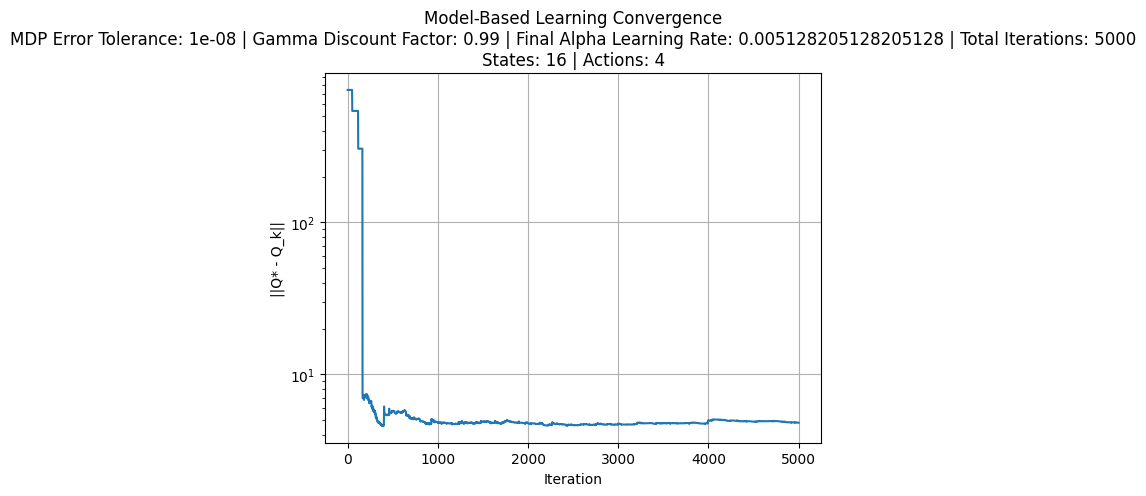

In [11]:

# --- Execução e Plotagem ---
# Define os parâmetros para a simulação.
iterations = 5000
epsilon_greedy = 0.1

# Executa o algoritmo de aprendizado baseado em modelo.
Q_model_based, Q_model_based_error_history = run_model_based_learning(
  s_states=S.copy(),
  a_actions=A.copy(),
  P_true=P.copy(),
  R_true=Rw.copy(),
  gamma_discount_factor=gamma,
  q_star_optimal=Q_star.copy(),
  num_iterations=iterations,
  epsilon_choice_random=epsilon_greedy,
  mdp_error_tolerance=1e-8,
  plot_graph=True
)

### 3. Temporal-difference learning

You will now run both Q-learning and SARSA, and compare their learning performance with the model-based method just studied.

---

#### Activity 4.        

Repeat Activity 3 but using the $Q$-learning algorithm with a learning rate $\alpha=0.3$.

---

In [12]:
%matplotlib inline

def run_q_learning(
  s_states: List[str],
  a_actions: List[str],
  P_true: List[np.ndarray],
  R_true: np.ndarray,
  gamma_discount_factor: float,
  q_star_optimal: np.ndarray,
  num_iterations: int = 5000,
  epsilon_choice_random: float = 0.1,
  alpha_learning_rate: float = 0.3,
  plot_graph: bool = True,
  goal_state: str = '6BR',
) -> (np.ndarray, List[float]):
  """
  Executa o algoritmo de aprendizado por reforço Q-learning.

  Args:
      s_states (List[str]): Lista de nomes dos estados.
      a_actions (List[str]): Lista de nomes das ações.
      P_true (List[np.ndarray]): Matrizes de transição verdadeiras do ambiente.
      R_true (np.ndarray): Matriz de recompensa verdadeira do ambiente.
      gamma_discount_factor (float): Fator de desconto.
      q_star_optimal (np.ndarray): A função Q ótima verdadeira para cálculo do erro.
      num_iterations (int): O número de iterações de aprendizado.
      epsilon_choice_random (float): O valor de epsilon para a política epsilon-greedy.
      alpha_learning_rate (float): A taxa de aprendizado.
      plot_graph (bool): Se deve plotar o gráfico de convergência.
      goal_state (str): O estado objetivo que, ao ser alcançado, reseta o agente.

  Returns:
      (np.ndarray, List[float]): Tupla contendo a função Q estimada e a lista do erro a cada iteração.
  """
  # Define variáveis locais para os parâmetros.
  num_states = len(s_states)
  num_actions = len(a_actions)
  goal_state_index = s_states.index(goal_state)

  # 1. Inicialização
  # Inicializa a função Q com zeros.
  Q_k = np.zeros((num_states, num_actions))
  # Lista para armazenar o erro a cada iteração.
  error_history = []
  # Inicia o agente em um estado aleatório.
  current_state_index = np.random.randint(num_states)

  # 2. Loop de Iterações
  for k in range(num_iterations):
    # Seleciona uma ação usando a política epsilon-greedy com a Q-function atual.
    action_index = select_action_epsilon_greedy(Q_k, current_state_index, epsilon_choice_random)

    # Simula a interação com o ambiente real para obter o próximo estado e a recompensa.
    next_state_index = np.random.choice(num_states, p=P_true[action_index][current_state_index])
    reward = R_true[current_state_index, action_index]

    # Atualização do Q-learning
    # Obtém o valor Q antigo para o par (estado, ação) atual.
    old_q_value = Q_k[current_state_index, action_index]
    # Encontra o valor Q máximo para o próximo estado (base da política greedy do Q-learning).
    max_next_q = np.max(Q_k[next_state_index])
    # Calcula o valor alvo da TD (Temporal Difference).
    td_target = reward + gamma_discount_factor * max_next_q
    # Calcula o novo valor Q usando a regra de atualização do Q-learning.
    new_q_value = old_q_value + alpha_learning_rate * (td_target - old_q_value)
    Q_k[current_state_index, action_index] = new_q_value

    # Calcula e armazena a norma do erro entre a Q ótima real e a Q estimada.
    error = np.linalg.norm(q_star_optimal - Q_k)
    error_history.append(error)

    # Verifica se o agente alcançou o estado objetivo.
    if current_state_index == goal_state_index:
      # Se alcançou, reseta para um estado aleatório na próxima iteração.
      current_state_index = np.random.randint(num_states)
    else:
      # Caso contrário, o próximo estado se torna o estado atual.
      current_state_index = next_state_index

  # Plota o gráfico do erro ao longo das iterações, se solicitado.
  if plot_graph:
    plt.figure()
    plt.plot(error_history)
    plt.yscale('log')
    plt.xlabel('Iteration')
    plt.ylabel('||Q* - Q_k||')
    plt.title('Q-Learning Convergence')
    plt.title(f'Q-Learning Convergence\n'
          f'Alpha Learning Rate: {alpha_learning_rate} | '
          f'Gamma Discount Factor: {gamma_discount_factor} | '
          f'Total Iterations: {len(error_history)}\n'
          f'States: {num_states} | Actions: {num_actions}\n'
          f'Epsilon: {epsilon_choice_random} | Goal State: {goal_state}'
        )
    plt.grid(True)
    plt.show()
    
  # 3. Retorna a Q-function estimada e o histórico de erros.
  return Q_k, error_history

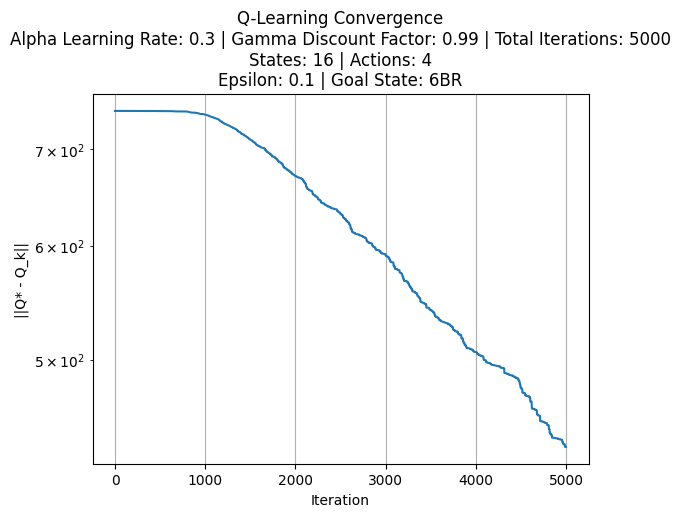

In [13]:
Q_q_learning, Q_q_learning_error_history = run_q_learning(
  s_states=S.copy(),
  a_actions=A.copy(),
  P_true=P.copy(),
  R_true=Rw.copy(),
  q_star_optimal=Q_star.copy(),
  num_iterations=iterations,
  gamma_discount_factor=gamma,
  epsilon_choice_random=0.1,
  alpha_learning_rate=0.3,
  goal_state='6BR',
  plot_graph=True
)

---

#### Activity 5.

Repeat Activity 4 but using the SARSA algorithm.

---

In [14]:
%matplotlib inline

def run_sarsa(
  s_states: List[str],
  a_actions: List[str],
  P_true: List[np.ndarray],
  R_true: np.ndarray,
  gamma_discount_factor: float,
  q_star_optimal: np.ndarray,
  num_iterations: int = 5000,
  epsilon_choice_random: float = 0.1,
  alpha_learning_rate: float = 0.3,
  plot_graph: bool = True,
  goal_state: str = '6BR',
) -> (np.ndarray, List[float]):
  """
  Executa o algoritmo de aprendizado por reforço SARSA.

  Args:
      s_states (List[str]): Lista de nomes dos estados.
      a_actions (List[str]): Lista de nomes das ações.
      P_true (List[np.ndarray]): Matrizes de transição verdadeiras do ambiente.
      R_true (np.ndarray): Matriz de recompensa verdadeira do ambiente.
      gamma_discount_factor (float): Fator de desconto.
      q_star_optimal (np.ndarray): A função Q ótima verdadeira para cálculo do erro.
      num_iterations (int): O número de iterações de aprendizado.
      epsilon_choice_random (float): O valor de epsilon para a política epsilon-greedy.
      alpha_learning_rate (float): A taxa de aprendizado.
      plot_graph (bool): Se deve plotar o gráfico de convergência.
      goal_state (str): O estado objetivo que, ao ser alcançado, reseta o agente.

  Returns:
      (np.ndarray, List[float]): Tupla contendo a função Q estimada e a lista do erro a cada iteração.
  """
  # Define variáveis locais para os parâmetros.
  num_states = len(s_states)
  num_actions = len(a_actions)
  goal_state_index = s_states.index(goal_state)

  # 1. Inicialização
  # Inicializa a função Q com zeros.
  Q_k = np.zeros((num_states, num_actions))
  # Lista para armazenar o erro a cada iteração.
  error_history = []
  
  # Inicia o agente em um estado aleatório.
  current_state_index = np.random.randint(num_states)
  # Escolhe a primeira ação (A) usando a política epsilon-greedy.
  action_index = select_action_epsilon_greedy(Q_k, current_state_index, epsilon_choice_random)

  # 2. Loop de Iterações
  for k in range(num_iterations):
    # Simula a interação com o ambiente para obter o próximo estado (S') e a recompensa (R).
    next_state_index = np.random.choice(num_states, p=P_true[action_index][current_state_index])
    reward = R_true[current_state_index, action_index]

    # Escolhe a próxima ação (A') a partir do próximo estado (S') usando a política epsilon-greedy.
    next_action_index = select_action_epsilon_greedy(Q_k, next_state_index, epsilon_choice_random)

    # Atualização do SARSA
    # Obtém o valor Q antigo para o par (estado, ação) atual.
    old_q_value = Q_k[current_state_index, action_index]
    # Obtém o valor Q para o par (próximo estado, próxima ação).
    next_q_value = Q_k[next_state_index, next_action_index]
    # Calcula o valor alvo da TD (Temporal Difference).
    td_target = reward + gamma_discount_factor * next_q_value
    # Calcula o novo valor Q usando a regra de atualização do SARSA.
    new_q_value = old_q_value + alpha_learning_rate * (td_target - old_q_value)
    Q_k[current_state_index, action_index] = new_q_value

    # Calcula e armazena a norma do erro entre a Q ótima real e a Q estimada.
    error = np.linalg.norm(q_star_optimal - Q_k)
    error_history.append(error)

    # Verifica se o agente alcançou o estado objetivo.
    if current_state_index == goal_state_index:
      # Se alcançou, reseta para um estado aleatório na próxima iteração.
      current_state_index = np.random.randint(num_states)
      # Escolhe a primeira ação do novo episódio.
      action_index = select_action_epsilon_greedy(Q_k, current_state_index, epsilon_choice_random)
    else:
      # Caso contrário, o próximo estado e a próxima ação se tornam os atuais.
      current_state_index = next_state_index
      action_index = next_action_index

  # Plota o gráfico do erro ao longo das iterações, se solicitado.
  if plot_graph:
    plt.figure()
    plt.plot(error_history)
    plt.yscale('log')
    plt.xlabel('Iteration')
    plt.ylabel('||Q* - Q_k||')
    plt.title(f'SARSA Convergence\n'
          f'Alpha Learning Rate: {alpha_learning_rate} | '
          f'Gamma Discount Factor: {gamma_discount_factor} | '
          f'Total Iterations: {len(error_history)}\n'
          f'States: {num_states} | Actions: {num_actions}\n'
          f'Epsilon: {epsilon_choice_random} | Goal State: {goal_state}'
        )
    plt.grid(True)
    plt.show()
    
  # 3. Retorna a Q-function estimada e o histórico de erros.
  return Q_k, error_history

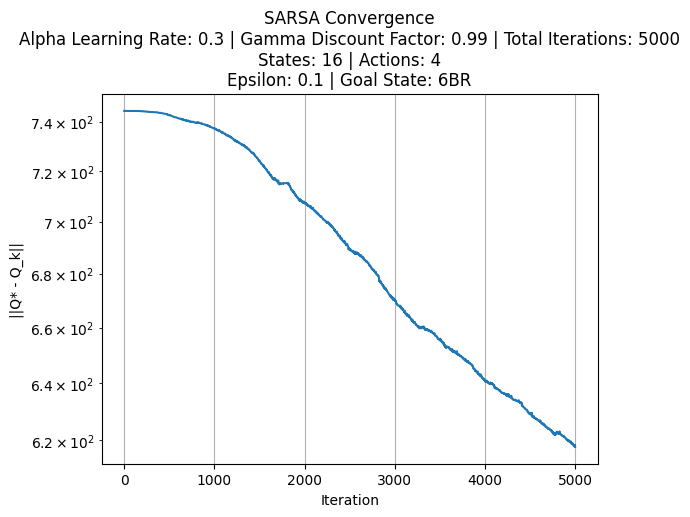

In [15]:
# --- Execução e Plotagem ---
Q_sarsa, Q_sarsa_error_history = run_sarsa(
  s_states=S.copy(),
  a_actions=A.copy(),
  P_true=P.copy(),
  R_true=Rw.copy(),
  q_star_optimal=Q_star.copy(),
  num_iterations=iterations,
  gamma_discount_factor=gamma,
  epsilon_choice_random=0.1,
  alpha_learning_rate=0.3,
  goal_state='6BR',
  plot_graph=True
)

---

#### Activity 6.

Discuss the differences observed between the performance of the three methods.

---

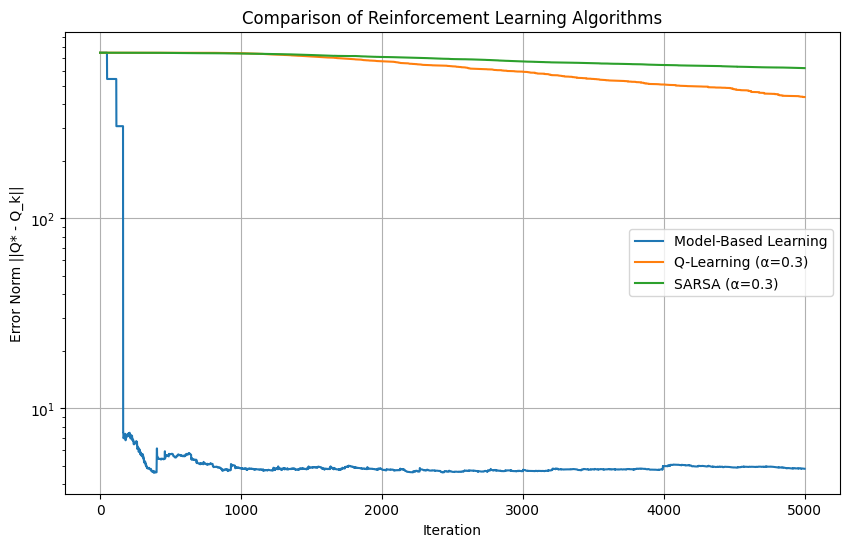

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(Q_model_based_error_history, label='Model-Based Learning')
plt.plot(Q_q_learning_error_history, label='Q-Learning (α=0.3)')
plt.plot(Q_sarsa_error_history, label='SARSA (α=0.3)')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Error Norm ||Q* - Q_k||')
plt.title('Comparison of Reinforcement Learning Algorithms')
plt.legend()
plt.grid(True)
plt.show()


Ao analisar o gráfico comparativo, podemos observar diferenças significativas no desempenho e na velocidade de convergência dos três métodos:

1.  **Aprendizado Baseado em Modelo (Model-Based Learning):**
    *   **Eficiência de Amostra:** Este método demonstra a convergência mais rápida, reduzindo o erro `||Q* - Q_k||` de forma muito mais acentuada nas iterações iniciais em comparação com os métodos de diferença temporal (TD). Isso ocorre porque ele é muito mais eficiente com as amostras. Cada transição `(s, a, r, s')` é usada para atualizar um modelo interno do ambiente (`P_hat` e `R_hat`). Em seguida, o algoritmo executa um passo de "planejamento" (usando iteração de valor), que propaga a informação daquela única amostra para toda a função de valor.
    *   **Custo Computacional:** Apesar de sua rápida convergência em termos de iterações (amostras), cada iteração é computacionalmente muito mais cara. Ela envolve a execução de um algoritmo de iteração de valor sobre todo o espaço de estados, o que é significativamente mais lento do que a simples atualização de Q-value dos métodos TD.

2.  **Q-Learning (Model-Free, Off-Policy):**
    *   **Convergência:** O Q-Learning converge mais lentamente que o método baseado em modelo, o que é esperado, pois ele é "model-free" e atualiza apenas o valor Q do par estado-ação específico a cada passo. A informação não é propagada tão eficientemente.
    *   **Estabilidade:** A curva de erro do Q-Learning é geralmente estável, mostrando uma diminuição constante. Como um algoritmo "off-policy", ele atualiza o valor de Q usando a ação de máximo valor no próximo estado (`max_a' Q(s', a')`), independentemente da ação que a política de exploração realmente tomará. Isso o faz aprender diretamente a política ótima, ignorando os efeitos das ações exploratórias na atualização.

3.  **SARSA (Model-Free, On-Policy):**
    *   **Convergência:** O desempenho do SARSA é semelhante ao do Q-Learning, mas sua convergência pode ser um pouco mais lenta ou mais ruidosa. Isso ocorre porque o SARSA é "on-policy". Sua atualização depende da próxima ação (`a'`) que é realmente escolhida pela política $\epsilon$-greedy. Se a próxima ação for exploratória (aleatória), a atualização do Q-value atual será baseada em uma ação potencialmente subótima, o que pode levar a uma convergência mais "cautelosa" ou instável em comparação com a abordagem mais direta do Q-Learning.
    *   **Comportamento:** O SARSA aprende o valor da política que está seguindo, incluindo os passos de exploração. Por isso, a política que ele aprende pode ser diferente da política ótima se a exploração ($\epsilon > 0$) continuar indefinidamente.

**Resumo:**

*   O **método baseado em modelo** é o mais eficiente em termos de amostras, convergindo muito rapidamente, mas com um alto custo computacional por iteração.
*   Os métodos **model-free (Q-Learning e SARSA)** são menos eficientes em amostras, exigindo mais iterações para convergir, mas cada iteração é computacionalmente muito barata.
*   Entre os métodos model-free, o **Q-Learning** tende a ser um pouco mais direto em sua convergência para a política ótima por ser off-policy, enquanto o **SARSA** (on-policy) pode ser mais sensível aos efeitos da exploração durante o aprendizado.

### Tabela Comparativa dos Algoritmos

| Característica | Aprendizado Baseado em Modelo | Q-Learning | SARSA |
| :--- | :--- | :--- | :--- |
| **Tipo de Algoritmo** | Baseado em Modelo (Model-Based) | Livre de Modelo (Model-Free) | Livre de Modelo (Model-Free) |
| **Política de Aprendizagem**| Off-policy (no passo de planejamento) | Off-policy | On-policy |
| **Necessita computar Q ótimo via MDP?** | Sim (para o modelo aprendido) | Não | Não |
| **Eficiência de Amostra**| Muito Alta | Baixa | Baixa |
| **Custo por Iteração** | Muito Alto (executa iteração de valor) | Baixo (atualização de um Q-valor) | Baixo (atualização de um Q-valor) |
| **Velocidade de Convergência**| Rápida em termos de amostras | Mais lenta que o baseado em modelo | Similar ao Q-Learning, pode ser mais instável |
| **Atualização Principal** | Aprende o modelo (P, R) e planeja | `max_a' Q(s', a')` | `Q(s', a')` (ação que será executada) |


O resultado observado com base na velocidade de convergência, o Model-based learning é mais rápido a alcançar a convergência em comparação ao Q ótimo obtido pela computação do MDP da atividade 2. 

Podemos observar a necessidade recomputar o Q com a abordagem do MDP a cada novo passo, o que deixa o processo mais lento, dado que a cada visita de um par ação / estado estamos recalculando o Q ótimo.

Em contrapartida, para um limite de 5000 iterações, observamos que algoritmo Q-learning é mais lento para a convergência que o Based-model learning e o algoritmo SARSA se comporta de forma similar ao Q-Learning, contudo, pode ser mais instável, dado que p Q-Learning utiliza uma abordagem 'off-policy' e o SARSA utiliza uma abordagem 'on-policy', sendo ambas abordagens exploratórias sobre o ambiente. 
 
Temos uma diferença fundamental também que é o Alpha (Learning Rate), que para essas abordagens model free é indicado de forma fixa, enquanto no model based é recalculado com base nas visitas de um par ação x estado.